# Part 1: Baseline model using MLP # 

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


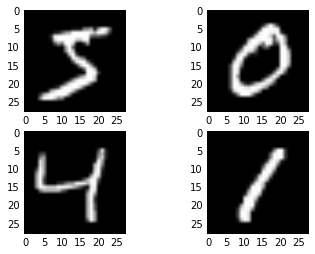

In [1]:
'''
Visualize first 4 images
'''
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
%pylab inline

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [2]:
'''
Load dataset
'''
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# Fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Load data using .load_data()
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
'''
For MLPs we need to reduce images down to a vector of pixels. A 28*28 sized image will be 784 pixel input vectors. 
The pixel values are integers so cast them into floating point values so that we can normalize them.
'''
# Flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]

# Reshape and cast pixels to float values. 
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [4]:
'''
Pixel values are in a 0 to 255 range. Normalize them to 0 to 1 range. 
'''
# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [5]:
'''
This is a multiclass classification problem, with the output classes being 0 to 9. We perform one-hot-encoding on the 
target classes using np_utils.to_categorical()
'''
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Get number of classes
num_classes = y_test.shape[1]
num_classes

10

In [6]:
'''
Define baseline model:

- Number of input features = 784 = number of neurons
- One hidden layer
- Rectifier(relu) activation function for neurons in hidden layer
- Softmax activation function for the output layer
- Output layer outputs 10 classes

NN Structure
784 -> [784] -> 10
'''
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, 
                    input_dim=num_pixels, 
                    init='normal', 
                    activation='relu'))
    model.add(Dense(num_classes, 
                    init='normal', 
                    activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [7]:
'''
Build the model and fit on training data.

10 epochs with updates every 200 images
'''
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, 
          y_train, 
          validation_data = (X_test, y_test), 
          nb_epoch=10, 
          batch_size=200, 
          verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
9s - loss: 0.2841 - acc: 0.9188 - val_loss: 0.1404 - val_acc: 0.9586
Epoch 2/10
9s - loss: 0.1127 - acc: 0.9669 - val_loss: 0.0933 - val_acc: 0.9716
Epoch 3/10
8s - loss: 0.0728 - acc: 0.9792 - val_loss: 0.0793 - val_acc: 0.9755
Epoch 4/10
9s - loss: 0.0513 - acc: 0.9854 - val_loss: 0.0735 - val_acc: 0.9783
Epoch 5/10
8s - loss: 0.0378 - acc: 0.9894 - val_loss: 0.0686 - val_acc: 0.9789
Epoch 6/10
8s - loss: 0.0271 - acc: 0.9927 - val_loss: 0.0642 - val_acc: 0.9806
Epoch 7/10
8s - loss: 0.0206 - acc: 0.9947 - val_loss: 0.0597 - val_acc: 0.9817
Epoch 8/10
8s - loss: 0.0137 - acc: 0.9972 - val_loss: 0.0603 - val_acc: 0.9813
Epoch 9/10
8s - loss: 0.0112 - acc: 0.9977 - val_loss: 0.0552 - val_acc: 0.9813
Epoch 10/10
8s - loss: 0.0081 - acc: 0.9986 - val_loss: 0.0588 - val_acc: 0.9819


In [8]:
'''
Check performance
'''
# Final evaluation of the model
scores = model.evaluate(X_test, 
                        y_test, 
                        verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.81%


# Part 2: Model using Convolutional Neural Network #

In [12]:
'''
Necessary extra imports
'''
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K

In [13]:
'''
In Keras, the layers used for 2D convolutions expect pixel values with the dimensions [channels][width][height]

For color images, channels = 3(RGB); for grey scale images, channels = 1.
'''
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [14]:
'''
Normalize features and one hot encode the classes as we did in part 1.
'''
# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## CNN Structure ##

* ** Convolutional Layer: **First hidden layer is a  that has 32 feature maps, with size 5 * 5 and a rectifier(relu) activation function.
* ** Pooling Layer: ** Pool size of 2 * 2, max value is MaxPooling2D
* ** Regularization Layer: ** Uses dropout using Dropout. It is configured to randomly exclude 20% of the neurons in the layer to reduce overfitting.
* ** Flatten Layer: ** Next layer converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by the fully connected layers.
* ** Fully Connected Layer: ** It has 128 neurons and the relu rectifier activation function.
* ** Output Layer: ** It has 10 neurons for the 10 output classes and softmax activation function is used to generate output probabilities for each class prediction.

In [15]:
'''
Define CNN:

Visible layer (1*28*28 inputs): 1 for the grey scale, 28*28 pixels
        |
Convolutional layer (32 feature maps, 5*5)
        |
Max pooling layer(2*2): To compress and generalize features and prevent overfitting
        |
Dropout layer(20%)
        |
Flatten layer
        |
Hidden layer(128 neurons)
        |
Output layer(10 outputs)
'''
def baseline_model():
    # create model
    model = Sequential()
    # Convolutional layer
    model.add(Convolution2D(32, 
                            5, 
                            5, 
                            input_shape=(1, 28, 28), 
                            activation='relu'))
    # Max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Dropout layer
    model.add(Dropout(0.2))
    # Flatten layer
    model.add(Flatten())
    # Hidden layer
    model.add(Dense(128, 
                    activation='relu'))
    # Output layer
    model.add(Dense(num_classes, 
                    activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [17]:
'''
Fit model over 10 epochs and a batch size of 200
'''
# Build the model
model = baseline_model()
# Fit the model
model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
          nb_epoch=3, # changed to 3 to save computation time
          batch_size=200, 
          verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
162s - loss: 0.2497 - acc: 0.9295 - val_loss: 0.0749 - val_acc: 0.9771
Epoch 2/3
162s - loss: 0.0751 - acc: 0.9770 - val_loss: 0.0507 - val_acc: 0.9832
Epoch 3/3
166s - loss: 0.0535 - acc: 0.9834 - val_loss: 0.0463 - val_acc: 0.9850


In [18]:
# Final evaluation of the model
scores = model.evaluate(X_test, 
                        y_test, 
                        verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.50%


# Part 3: Using a larger CNN #

Structure of CNN is as follows:

* ** Convolutional layer: ** 30 feature maps of size 5 * 5
* ** Pooling layer: ** taking the max of 2 * 2 patches
* ** Convolutional layer: ** 15 feature maps of size 3 * 3
* ** Pooling layer: ** taking the max over 2 * 2 patches
* ** Dropout layer ** with a probability of 20%
* ** Flatten layer: ** to feed output to the fully connected layer
* ** Fully connected layer: ** with 128 neurons and relu rectifier activation. 
* ** Fully connected layer: ** with 50 neurons and relu rectifier activation. 
* ** Output layer: **

In [19]:
'''
Define CNN:

Visible layer (1*28*28 inputs): 1 for the grey scale, 28*28 pixels
        |
Convolutional layer (30 feature maps, 5*5)
        |
Max pooling layer(2*2): To compress and generalize features and prevent overfitting
        |
Convolutional layer (15 feature maps, 5*5)
        |
Max pooling layer(2*2): To compress and generalize features and prevent overfitting
        |
Dropout layer(20%)
        |
Hidden layer(128 neurons)
        |  
Hidden layer(50 neurons)
        |  
Flatten layer
        |
Hidden layer(128 neurons)
        |
Output layer(10 outputs)
'''
K.set_image_dim_ordering('th')

# Fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

'''
Change in CNN applied here.
'''
# Define the larger model
def larger_model():
    # create model
    model = Sequential()
    # Convolution Layer
    model.add(Convolution2D(30, 
                            5, 
                            5, 
                            input_shape=(1, 28, 28), 
                            activation='relu'))
    # Max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Convolution Layer
    model.add(Convolution2D(15, 
                            3, 
                            3, 
                            activation='relu'))
    # Max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Dropout layer
    model.add(Dropout(0.2))
    # Flaten layer
    model.add(Flatten())
    # Hidden layer
    model.add(Dense(128, 
                    activation='relu'))
    # Hidden layer
    model.add(Dense(50, 
                    activation='relu'))
    # Output layer
    model.add(Dense(num_classes, 
                    activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

# Build the model
model = larger_model()
# Fit the model
model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
          nb_epoch=3, # Changed to 3 to time saving 
          batch_size=200, 
          verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
190s - loss: 0.3905 - acc: 0.8782 - val_loss: 0.0805 - val_acc: 0.9751
Epoch 2/3
222s - loss: 0.1019 - acc: 0.9694 - val_loss: 0.0542 - val_acc: 0.9814
Epoch 3/3
227s - loss: 0.0753 - acc: 0.9766 - val_loss: 0.0454 - val_acc: 0.9857
Large CNN Error: 1.43%


# Part 4: Image augmentation #

The ImageDataGenerator class has the following augmentation capabilities:

* Feature wise standardization
* ZCA whitening
* Random rotation, shifts, shear and flips
* Dimension reordering
* Save augmented images to disk
* The API is designed to be iterated by the deep learning model fitting process creating augmented images JUST-IN-TIME and not by performing operations on the entire dataset. 

In [21]:
'''
Set up augmented image generator
'''
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

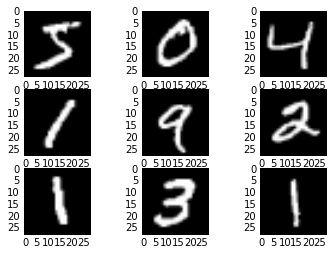

In [20]:
'''
Plotting of images as baseline for comparison
'''
from matplotlib import pyplot

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], 
                  cmap = pyplot.get_cmap('gray'))

pyplot.show()

## 4.1 Feature Standardization ##

* Standardize pixel values across an entire dataset.
* Each image is considered a feature

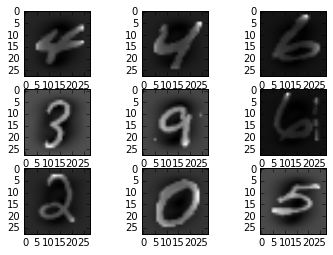

In [22]:
'''
Feature standardization is done by setting featurewise_center and featurewise_std_normalization to True.

ImageDataGenerator(featurewise_center=True, 
                   featurewise_std_normalization=True)

Standardize images across the dataset, mean=0, stdev=1
'''
 
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

# Convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Define data preparation
datagen = ImageDataGenerator(featurewise_center=True, 
                             featurewise_std_normalization=True)

# Fit parameters from data
datagen.fit(X_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 9):
    # Create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), 
                      cmap = pyplot.get_cmap('gray'))
    # Show the plot
    pyplot.show()
    break

## 4.2 ZCA Whitening ## 

* This is done to reduce the redundancy in the matrix of pixel images. 
* It highlights the structures and features in the image to the learning algorithm.
* ZCA performs better than PCA as it keeps all of the orginal dimensions and the resulting transformed images still look like their originals.

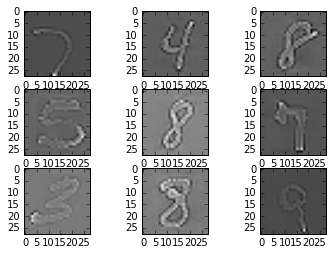

In [23]:
''' 
ZCA whitening is done by setting zca_whitening to True
'''

'''
Same steps as 4.1
'''
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# Convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

'''
Define data preparation with zca_whitening
''' 
datagen = ImageDataGenerator(zca_whitening=True)

# Fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # Show the plot
    pyplot.show()
    break

## 4.3: Random Shifts ##

Objects in the images may not be centered. Random shifts are done to handle off center objects by artificially creating shifted versions of our training data. 

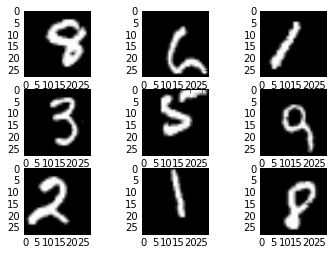

In [24]:
'''
Random Shifts are done by setting width_shift_range = shift, height_shift_range = shift
'''

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# Convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

'''
Define data preparation with width_shift_range and height_shift_range
''' 
shift = 0.2
datagen = ImageDataGenerator(width_shift_range = shift, 
                             height_shift_range = shift)

# Fit parameters from data
datagen.fit(X_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # Create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), 
                      cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

## 4.4 Random flips ##

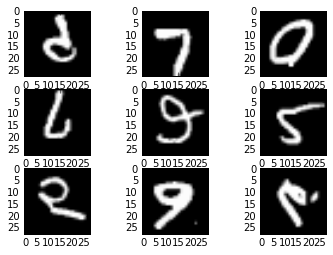

In [25]:
'''
Random Flips is set by horizontal_flip = True, vertical_flip = True
'''
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# Convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

'''
Define data preparation with horizontal_flip and vertical_flip
''' 
datagen = ImageDataGenerator(horizontal_flip=True, 
                             vertical_flip=True)

# Fit parameters from data
datagen.fit(X_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # Create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), 
                      cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

## Part 5: Saving augmented images to file ##

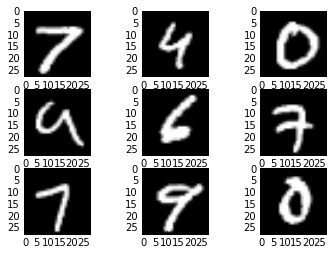

In [26]:
'''
Save augmented images to file using flow()
'''

import os
from keras import backend as K
K.set_image_dim_ordering('th')

'''
Same as previous code in Part 4
'''
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# Convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Define data preparation
datagen = ImageDataGenerator()
# Fit parameters from data
datagen.fit(X_train)

'''
Saving images to file using datagen.flow
'''
# Configure batch size and retrieve one batch of images
os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, 
                                     y_train, 
                                     batch_size=9, 
                                     save_to_dir='images', 
                                     save_prefix='aug', 
                                     save_format='png'):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # Show the plot
    pyplot.show()
    break